In [ ]:
df1 = pd.read_csv('수자원+최종.csv', encoding = 'euc-kr', thousands=',')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69048 entries, 0 to 69047
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  69048 non-null  int64  
 1   시군          69048 non-null  object 
 2   날짜          69048 non-null  object 
 3   강수량         69048 non-null  float64
 4   댐이름         69048 non-null  object 
 5   수계          69048 non-null  object 
 6   전일강우량       69048 non-null  float64
 7   금년누계강우량     69048 non-null  float64
 8   전년누계강우량     69048 non-null  float64
 9   예년누계강우량     69048 non-null  float64
 10  전일유입량유량     69048 non-null  float64
 11  본댐전일방류량유량   69048 non-null  float64
 12  조정지전일방류량유량  69048 non-null  float64
 13  현재저수위       69048 non-null  float64
 14  전년저수위       69048 non-null  float64
 15  예년저수위       69048 non-null  float64
 16  현재저수량       69048 non-null  float64
 17  전년저수량       69048 non-null  float64
 18  예년저수량       69048 non-null  float64
 19  현재저수율       69048 non-nul

In [ ]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df1

,시군,날짜,강수량,댐이름,수계,전일강우량,금년누계강우량,전년누계강우량,예년누계강우량,전일유입량유량,본댐전일방류량유량,조정지전일방류량유량,현재저수위,전년저수위,예년저수위,현재저수량,전년저수량,예년저수량,현재저수율,year,month,day,지점명,지점코드,spi1,spei1,pn1,edi
0,서울,2018-08-01,0.0,소양강,한강,0.0,738.0,718.7,702.1,13.7,45.5,0.0,177.55,183.34,175.54,1621.8,1904.7,1531.8,55.9,2018,8,1,서울,108,-3.09,-1.20,26.60,-0.64
1,부산,2018-08-01,0.0,안동,낙동강,0.0,660.3,535.6,659.4,1.7,6.0,4.5,148.61,144.62,145.61,695.7,557.9,589.4,55.7,2018,8,1,부산,159,-1.12,-1.50,35.60,-0.50
2,대구,2018-08-01,0.0,임하,낙동강,0.0,608.0,467.8,559.7,1.5,42.8,37.5,152.72,149.68,146.77,332.8,279.5,235.1,55.9,2018,8,1,대구,143,-0.63,-0.50,56.70,-0.45
3,인천,2018-08-01,0.0,소양강,한강,0.0,738.0,718.7,702.1,13.7,45.5,0.0,177.55,183.34,175.54,1621.8,1904.7,1531.8,55.9,2018,8,1,인천,112,-1.77,-1.30,27.90,-0.66
4,인천(강화),2018-08-01,0.0,소양강,한강,0.0,738.0,718.7,702.1,13.7,45.5,0.0,177.55,183.34,175.54,1621.8,1904.7,1531.8,55.9,2018,8,1,강화,201,-1.45,-1.70,32.10,-1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69043,거제,2021-07-31,47.2,남강,낙동강,0.0,773.6,1211.0,876.5,11.6,29.8,0.0,37.92,42.41,38.45,104.1,223.4,116.2,33.7,2021,7,31,거제,294,0.64,0.64,125.38,-0.03
69044,남해,2021-07-31,4.5,남강,낙동강,0.0,773.6,1211.0,876.5,11.6,29.8,0.0,37.92,42.41,38.45,104.1,223.4,116.2,33.7,2021,7,31,남해,295,0.97,0.95,146.62,-0.15
69045,산청,2021-07-31,0.0,남강,낙동강,0.0,773.6,1211.0,876.5,11.6,29.8,0.0,37.92,42.41,38.45,104.1,223.4,116.2,33.7,2021,7,31,산청,289,-0.46,-0.64,64.23,-0.94
69046,거창,2021-07-31,0.0,합천,낙동강,0.0,575.9,1101.6,746.0,3.2,17.7,17.2,157.53,176.55,157.98,361.1,737.8,368.2,45.7,2021,7,31,거창,284,-0.26,-0.44,76.42,-0.77


현재 모델 10이 가장 성능 좋다!!

- 음수는 불가능하므로 0으로 만든 후 재평가
- 어느정도 y=x그래프 그리도록!
- mae값 0.03이하

- 개념: https://wikidocs.net/32105

- optimizer 비교: https://seamless.tistory.com/38
- 모델 저장 및 가져오기: https://tykimos.github.io/2017/06/10/Model_Save_Load/

- 회귀 모델 평가방법: https://brunch.co.kr/@chris-song/34

- 손실함수: https://bskyvision.com/822

- MAE는 에러 절대값의 평균으로 예측 칼럼이 0~1의 값이므로 그 자체를 전체 값의 에러 비율로 보면 된다.

- 문서작성 참고: https://www.dbpia.co.kr/pdf/pdfView.do?nodeId=NODE07252156&mark=0&useDate=&bookmarkCnt=9&ipRange=N&accessgl=Y&language=ko_KR

In [ ]:
keras.metrics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [ ]:
new_data = pd.read_csv('수자원 전처리.csv', encoding = 'euc-kr', thousands=',')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69048 entries, 0 to 69047
Columns: 168 entries, Unnamed: 0 to 지점명_홍천
dtypes: float64(19), int64(149)
memory usage: 88.5 MB


In [ ]:
new_data.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
#new_data.drop('edi', axis=1, inplace=True)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69048 entries, 0 to 69047
Columns: 167 entries, 전일강우량 to 지점명_홍천
dtypes: float64(19), int64(148)
memory usage: 88.0 MB


In [ ]:
new_data.head()

,전일강우량,금년누계강우량,전년누계강우량,예년누계강우량,전일유입량유량,본댐전일방류량유량,조정지전일방류량유량,전년저수위,예년저수위,전년저수량,예년저수량,현재저수율,year,month,day,spi1,spei1,pn1,시군_강릉,시군_거제,시군_거창,시군_경주,시군_고흥,시군_광주,시군_구미,시군_군산,시군_금산,시군_남원,시군_남해,시군_대구,시군_대전,시군_목포,시군_문경,시군_밀양,시군_보령,시군_보은,시군_봉화,시군_부산,시군_부안,시군_부여,...,지점명_부여,지점명_산청,지점명_서산,지점명_서울,지점명_속초,지점명_수원,지점명_안동,지점명_양평,지점명_여수,지점명_영덕,지점명_영주,지점명_영천,지점명_완도,지점명_울산,지점명_울진,지점명_원주,지점명_의성,지점명_이천,지점명_인제,지점명_인천,지점명_임실,지점명_장수,지점명_장흥,지점명_전주,지점명_정읍,지점명_제천,지점명_진주,지점명_창원,지점명_천안,지점명_철원,지점명_청주,지점명_추풍령,지점명_춘천,지점명_충주,지점명_태백,지점명_통영,지점명_포항,지점명_합천,지점명_해남,지점명_홍천
0,0.0,0.338999,0.393425,0.465209,0.002628,0.008952,0.000000,0.767246,0.732834,0.787753,0.808342,0.570408,0.0,0.636364,0.0,0.096128,0.351171,0.026841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.303169,0.293151,0.436713,0.000202,0.001194,0.000925,0.576187,0.577265,0.230451,0.310982,0.568367,0.0,0.636364,0.0,0.359146,0.301003,0.035923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.279283,0.255890,0.370444,0.000202,0.008355,0.008555,0.601155,0.583294,0.115432,0.124076,0.570408,0.0,0.636364,0.0,0.424566,0.468227,0.057214,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.338999,0.393425,0.465209,0.002628,0.008952,0.000000,0.767246,0.732834,0.787753,0.808342,0.570408,0.0,0.636364,0.0,0.272363,0.334448,0.028153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.338999,0.393425,0.465209,0.002628,0.008952,0.000000,0.767246,0.732834,0.787753,0.808342,0.570408,0.0,0.636364,0.0,0.315087,0.267559,0.032391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [ ]:
trainX.shape

(48333, 166)


- 손실함수:
  - 회귀: 평균제곱오차(MAE, MSE..)
- metrics: 화면상
 아웃풋
- 활성화 함수:

# 10

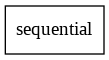

In [ ]:
#모델 생성
model10 = keras.Sequential()
#swish->매우 깊은 신경망에서 relu보다 높은 정확도
model10.add(keras.layers.Dense(16, activation='relu')) #시군 칼럼약 62개 -> 작은 유닛
model10.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model10.add(keras.layers.Dense(128, activation='relu')) #날짜 연월일 3년치
model10.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model10.add(keras.layers.Dense(256, activation='relu')) #댐관련 데이터
model10.add(layers.Dropout(0.2)) # 드롭아웃 추가.
model10.add(keras.layers.Dense(512, activation='swish')) # 가뭄관련 데이터
#중간층이 출력층보다 많이 작으면 정보의 병목 발생
model10.add(layers.Dropout(0.3)) # 드롭아웃 추가.
model10.add(layers.Dense(1)) #출력코드 1개의 값 예측

keras.utils.plot_model(model10)

In [ ]:
#Early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 40)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model10.compile(optimizer="adam", loss="mse", metrics=["mean_absolute_error"])
#학습
hist10 = model10.fit(trainX, trainY, epochs=1000, validation_split=0.25, callbacks=[callbacks, mc], verbose=0)

In [ ]:
model10_best = keras.models.load_model('best_model.h5')

In [ ]:
model10.evaluate(testX, testY)

648/648 [==============================] - 1s 2ms/step - loss: 8.3633e-04 - mean_absolute_error: 0.0202


[0.0008363295346498489, 0.020196065306663513]

In [ ]:
print(hist10.history)

{'loss': [0.0142976688221097, 0.006210127845406532, 0.004968632478266954, 0.004345750901848078, 0.00395618099719286, 0.0037671024911105633, 0.003519183723255992, 0.0032871426083147526, 0.003142392262816429, 0.0029832511208951473, 0.002844852628186345, 0.002686913823708892, 0.0025262506678700447, 0.0023978021927177906, 0.0023531815968453884, 0.0022024407517164946, 0.0021239425987005234, 0.002078758552670479, 0.002044329419732094, 0.001978454878553748, 0.0020124316215515137, 0.00196918030269444, 0.0018932116217911243, 0.0018612062558531761, 0.0018581341719254851, 0.0018566895741969347, 0.001846591243520379, 0.0017667713109403849, 0.0017859701765701175, 0.0017655204283073545, 0.001750483294017613, 0.00164532451890409, 0.001685121562331915, 0.0016846113139763474, 0.0016832058317959309, 0.001584766199812293, 0.0016003450145944953, 0.0016115676844492555, 0.0015672789886593819, 0.0016277598915621638, 0.0016079479828476906, 0.001625776756554842, 0.0016294704983010888, 0.0015254111494868994, 0.

In [ ]:
import pprint
pprint.pprint(hist10.history['mean_absolute_error'])

[0.08841873705387115,
 0.060308218002319336,
 0.05316575989127159,
 0.04939042776823044,
 0.047214239835739136,
 0.04557966813445091,
 0.04411081597208977,
 0.042407456785440445,
 0.041384320706129074,
 0.04034965857863426,
 0.039228808134794235,
 0.03797060251235962,
 0.03681253641843796,
 0.03566392883658409,
 0.035114094614982605,
 0.034240853041410446,
 0.033437952399253845,
 0.03320569172501564,
 0.032637111842632294,
 0.03229180723428726,
 0.03243083134293556,
 0.03204096853733063,
 0.03158733248710632,
 0.031225720420479774,
 0.031226104125380516,
 0.031002363190054893,
 0.03083229251205921,
 0.030310554429888725,
 0.030407628044486046,
 0.030065683647990227,
 0.02995774708688259,
 0.029219260439276695,
 0.029637431725859642,
 0.029340434819459915,
 0.029401009902358055,
 0.028686681762337685,
 0.028778916224837303,
 0.028868788853287697,
 0.028376122936606407,
 0.028802569955587387,
 0.028559431433677673,
 0.02862214297056198,
 0.02856009639799595,
 0.02799198031425476,
 0.0277

In [ ]:
from keras.models import load_model
model10.save('deep_learning_model10.h5')

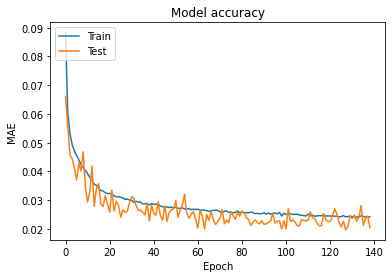

In [ ]:
#훈련 과정 시각화 (MAE)
plt.plot(hist10.history["mean_absolute_error"])
plt.plot(hist10.history['val_mean_absolute_error'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

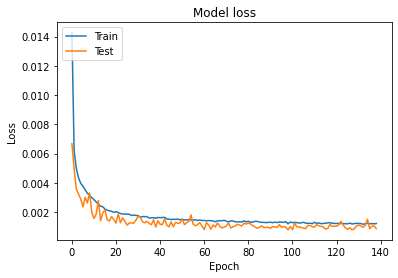

In [ ]:
#훈련 과정 시각화 (손실)
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2672      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

## 모델10 불러와서 모델 사용

- 정규화 되돌리도록

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
new_data = pd.read_csv('수자원 전처리.csv', encoding = 'euc-kr', thousands=',')
new_data.drop('Unnamed: 0', axis=1, inplace = True)
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)
#random_state의 seed가 같으므로 학습에 쓰이지 않은 데이터만 추출 가능

In [ ]:
#모델 불러오기
from keras.models import load_model
model = load_model('deep_learning_model10.h5')

In [ ]:
loss, mae = model.evaluate(testX, testY, batch_size=2)
print(f'loss: {loss}, mean_absoulute_error: {mae}')
#mae는 특이값 많은 경우 유용한데, 이 데이터의 경우 폭우, 폭염에도 정확함을 보여줌

10358/10358 [==============================] - 13s 1ms/step - loss: 9.2916e-04 - mean_absolute_error: 0.0219
loss: 0.0009291619062423706, mean_absoulute_error: 0.02188664674758911


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def RMSE(testY, y_hat):
  return np.sqrt(mean_squared_error(testY, y_hat))

In [ ]:
y_pred = model.predict(testX)

In [ ]:
#y_pred 음수인 것은 0으로 바꿈
y_hat = []
for i in range(len(y_pred)):
  if y_pred[i][0] >= 0:
    y_hat.append(y_pred[i][0])
  elif y_pred[i][0] < 0:
    y_hat.append(0)

In [ ]:
#음수 예측 확인
for i in y_hat:
  if i < 0:
    print('음수 있음')

In [ ]:
print(f'RMSE: {RMSE(testY, y_pred)}')
print(f'RMSE: {RMSE(testY, y_hat)}')

RMSE: 0.030482146195919924
RMSE: 0.030253028136599993


In [ ]:
print(y_pred)
print(len(y_pred))
print(testY) #series

[[0.38394696]
 [0.4707669 ]
 [0.6498882 ]
 ...
 [0.577905  ]
 [0.8921491 ]
 [0.5850777 ]]
20715
43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64


In [ ]:
#시각화를 위해 리스트로 변경
x = testY.index
y = testY.values

In [ ]:
print(len(y_hat))

20715


In [ ]:
print(len(y))

20715


In [ ]:
df=testY.to_frame(name='y')
df['y_hat'] = y_hat

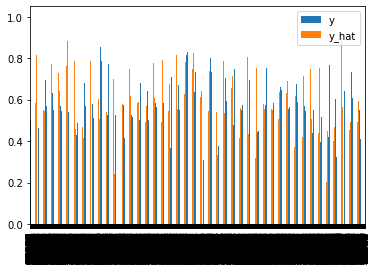

In [ ]:
df.plot(y = ['y', 'y_hat'], kind='bar')

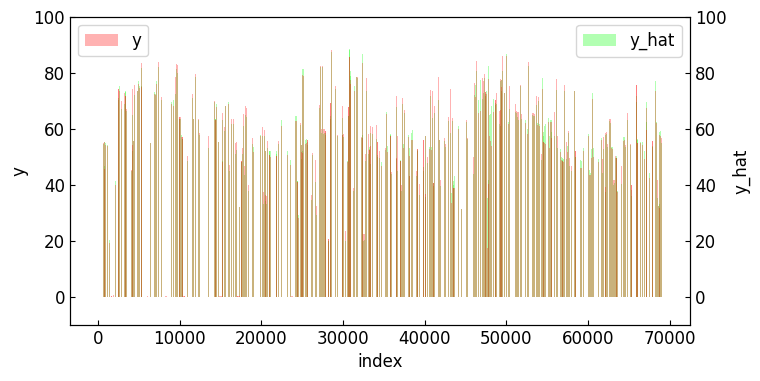

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
 #정규화한 값 되돌리기
max=98.00000
min=0.00000

x = testY.index
y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

#ax1.set_xlim([15000, 55000])

ax1.bar(x, y1, color='#FF0000', alpha=0.3, width=2, label = 'y') #red
ax1.set_ylim(-10, 100)
ax1.set_xlabel('index')
ax1.set_ylabel('y')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx() #x축 공유하는 이중 y축 생성
ax2.bar(x, y2, color='#00FF00', alpha=0.3, width=2, label = 'y_hat') #lime
ax2.set_ylim(-10, 100)
ax2.set_ylabel('y_hat')
ax2.tick_params(axis='y', direction='in')

#배치 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
(testY)

43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64

In [ ]:
df = testY.to_frame(name='y')

In [ ]:
df['y_hat'] = y_hat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20715 entries, 43979 to 40279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20715 non-null  float64
 1   y_hat   20715 non-null  float64
dtypes: float64(2)
memory usage: 485.5 KB


In [ ]:
df

,y,y_hat
43979,0.371429,0.383947
34344,0.491837,0.470767
3560,0.651020,0.649888
46955,0.682653,0.643780
16178,0.000000,0.000000
...,...,...
40066,0.516327,0.475745
18492,0.675510,0.624228
33337,0.652041,0.577905
30911,0.871429,0.892149


In [ ]:
df['y'] = df['y']*98.00000
df['y_hat'] = df['y_hat']*98.00000

In [ ]:
df['index'] = testX.index

In [ ]:
df

,y,y_hat,index
43979,36.4,37.626802,43979
34344,48.2,46.135156,34344
3560,63.8,63.689045,3560
46955,66.9,63.090393,46955
16178,0.0,0.000000,16178
...,...,...,...
40066,50.6,46.623027,40066
18492,66.2,61.174297,18492
33337,63.9,56.634690,33337
30911,85.4,87.430611,30911


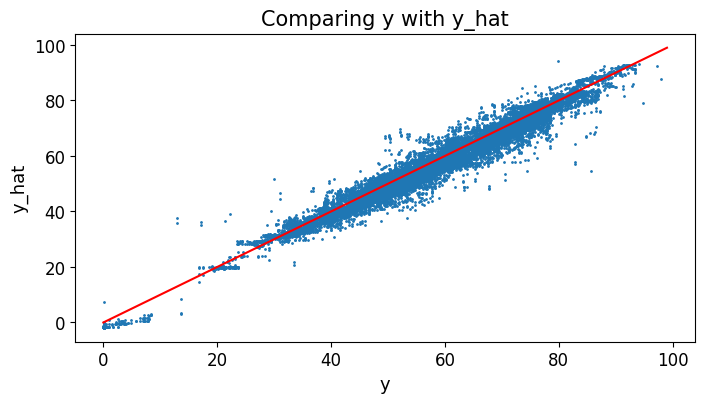

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max=98.00000
min=0.00000

y=testY.values
y_pred = model.predict(testX)

y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

plt.scatter(y1, y2, s=1)

x_check=list(range(0, 100))
y_check=list(range(0, 100))
plt.plot(x_check, y_check, color='red')

plt.title("Comparing y with y_hat",fontsize=15)
plt.xlabel("y",fontsize=13)
plt.ylabel("y_hat",fontsize=13)
plt.show()

# 11

In [ ]:
#모델 생성
model11 = keras.Sequential()
#swish->매우 깊은 신경망에서 relu보다 높은 정확도
model11.add(keras.layers.Dense(16, activation='relu')) #시군 칼럼약 62개 -> 작은 유닛
model11.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model11.add(keras.layers.Dense(128, activation='relu')) #날짜 연월일 3년치
model11.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model11.add(keras.layers.Dense(256, activation='relu')) #댐관련 데이터
model11.add(layers.Dropout(0.2)) # 드롭아웃 추가.
model11.add(keras.layers.Dense(512, activation='swish')) # 가뭄관련 데이터
#중간층이 출력층보다 많이 작으면 정보의 병목 발생
model11.add(layers.Dropout(0.3)) # 드롭아웃 추가.
model11.add(layers.Dense(1)) #출력코드 1개의 값 예측

In [ ]:
#Early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 40)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model11.compile(optimizer="nadam", loss="mse", metrics=["mean_absolute_error"])
#학습
hist11 = model11.fit(trainX, trainY, epochs=1000, validation_split=0.25, callbacks=[callbacks, mc], verbose=0)

In [ ]:
model11_best = keras.models.load_model('best_model.h5')

In [ ]:
model11.evaluate(testX, testY)

648/648 [==============================] - 1s 2ms/step - loss: 9.7766e-04 - mean_absolute_error: 0.0223


[0.0009776570368558168, 0.022328311577439308]

In [ ]:
import pprint
pprint.pprint(hist11.history['mean_absolute_error'])

[0.0850430279970169,
 0.05783546715974808,
 0.05090603232383728,
 0.04746372997760773,
 0.044929102063179016,
 0.04331301152706146,
 0.04158582538366318,
 0.04031120985746384,
 0.03934595733880997,
 0.03859896957874298,
 0.03751438856124878,
 0.036720745265483856,
 0.036120835691690445,
 0.035078197717666626,
 0.03465082123875618,
 0.0339571051299572,
 0.03320666775107384,
 0.03275645151734352,
 0.03219705447554588,
 0.0316777266561985,
 0.03147638589143753,
 0.031246861442923546,
 0.031150775030255318,
 0.030695199966430664,
 0.03049926459789276,
 0.030129143968224525,
 0.029943956062197685,
 0.02989468164741993,
 0.029721634462475777,
 0.029584717005491257,
 0.029467327520251274,
 0.02923804335296154,
 0.029175687581300735,
 0.028905635699629784,
 0.028881993144750595,
 0.028744714334607124,
 0.02890818938612938,
 0.028509272262454033,
 0.028167329728603363,
 0.02814260497689247,
 0.028197765350341797,
 0.027823684737086296,
 0.027537215501070023,
 0.02795766294002533,
 0.02736712433

In [ ]:
from keras.models import load_model
model11.save('deep_learning_model11.h5')

In [ ]:
model11.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2672      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

## 모델11 불러와서 모델 사용

- 정규화 되돌리도록

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
new_data = pd.read_csv('수자원 전처리.csv', encoding = 'euc-kr', thousands=',')
new_data.drop('Unnamed: 0', axis=1, inplace = True)
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)
#random_state의 seed가 같으므로 학습에 쓰이지 않은 데이터만 추출 가능

In [ ]:
#모델 불러오기
from keras.models import load_model
model = load_model('deep_learning_model11.h5')

In [ ]:
loss, mae = model.evaluate(testX, testY, batch_size=2)
print(f'loss: {loss}, mean_absoulute_error: {mae}')
#mae는 특이값 많은 경우 유용한데, 이 데이터의 경우 폭우, 폭염에도 정확함을 보여줌

10358/10358 [==============================] - 10s 1ms/step - loss: 9.7766e-04 - mean_absolute_error: 0.0223
loss: 0.0009776575025171041, mean_absoulute_error: 0.02232835255563259


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def RMSE(testY, y_hat):
  return np.sqrt(mean_squared_error(testY, y_hat))

In [ ]:
y_pred = model.predict(testX)

In [ ]:
print(f'RMSE: {RMSE(testY, y_pred)}')

RMSE: 0.031267495853645036


In [ ]:
print(y_pred)
print(len(y_pred))
print(testY) #series

[[0.3785433 ]
 [0.49495837]
 [0.6509822 ]
 ...
 [0.5878392 ]
 [0.86066103]
 [0.5767022 ]]
20715
43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64


In [ ]:
#시각화를 위해 리스트로 변경
x = testY.index
y = testY.values

In [ ]:
y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

In [ ]:
print(len(y_hat))

20715


In [ ]:
print(len(y))

20715


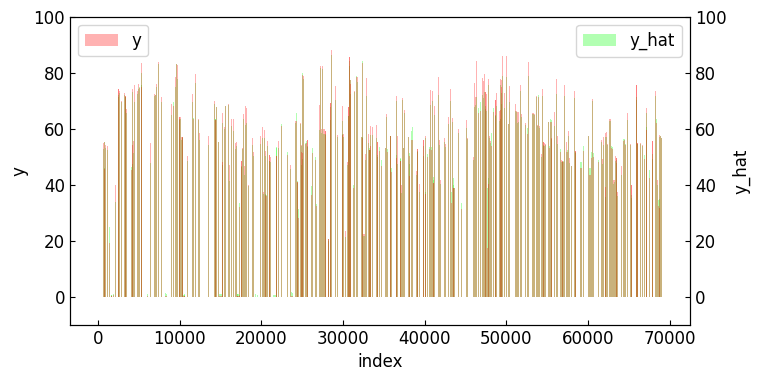

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
 #정규화한 값 되돌리기
max=98.00000
min=0.00000

x = testY.index
y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

#ax1.set_xlim([15000, 55000])

ax1.bar(x, y1, color='#FF0000', alpha=0.3, width=2, label = 'y') #red
ax1.set_ylim(-10, 100)
ax1.set_xlabel('index')
ax1.set_ylabel('y')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx() #x축 공유하는 이중 y축 생성
ax2.bar(x, y2, color='#00FF00', alpha=0.3, width=2, label = 'y_hat') #lime
ax2.set_ylim(-10, 100)
ax2.set_ylabel('y_hat')
ax2.tick_params(axis='y', direction='in')

#배치 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
(testY)

43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64

In [ ]:
df = testY.to_frame(name='y')

In [ ]:
df['y_hat'] = y_hat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20715 entries, 43979 to 40279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20715 non-null  float64
 1   y_hat   20715 non-null  float64
dtypes: float64(2)
memory usage: 485.5 KB


In [ ]:
df

,y,y_hat
43979,0.371429,0.378543
34344,0.491837,0.494958
3560,0.651020,0.650982
46955,0.682653,0.642226
16178,0.000000,0.008388
...,...,...
40066,0.516327,0.483784
18492,0.675510,0.611132
33337,0.652041,0.587839
30911,0.871429,0.860661


In [ ]:
df['y'] = df['y']*98.00000
df['y_hat'] = df['y_hat']*98.00000

In [ ]:
df['index'] = testX.index

In [ ]:
df

,y,y_hat,index
43979,36.4,37.097242,43979
34344,48.2,48.505920,34344
3560,63.8,63.796256,3560
46955,66.9,62.938193,46955
16178,0.0,0.822040,16178
...,...,...,...
40066,50.6,47.410825,40066
18492,66.2,59.890974,18492
33337,63.9,57.608240,33337
30911,85.4,84.344781,30911


In [ ]:
#음수 예측 확인
df[df['y_hat']<0]

,y,y_hat,index


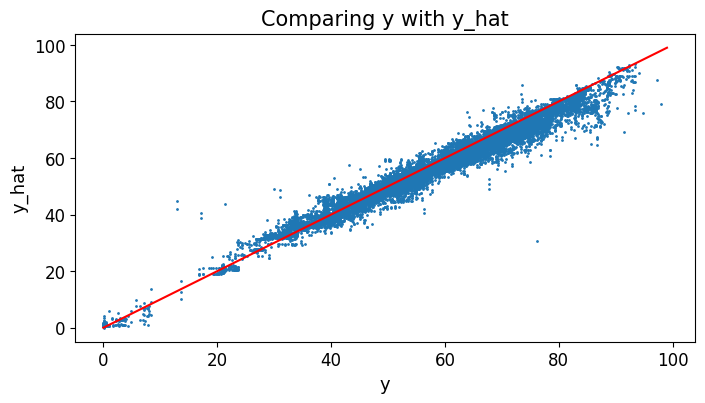

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max=98.00000
min=0.00000

y=testY.values
y_pred = model.predict(testX)

y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

plt.scatter(y1, y2, s=1)

x_check=list(range(0, 100))
y_check=list(range(0, 100))
plt.plot(x_check, y_check, color='red')

plt.title("Comparing y with y_hat",fontsize=15)
plt.xlabel("y",fontsize=13)
plt.ylabel("y_hat",fontsize=13)
plt.show()

# 12

In [ ]:
#모델 생성
model12 = keras.Sequential()
#swish->매우 깊은 신경망에서 relu보다 높은 정확도
model12.add(keras.layers.Dense(32, activation='relu')) #시군 칼럼약 62개 -> 작은 유닛
model12.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model12.add(keras.layers.Dense(128, activation='relu')) #날짜 연월일 3년치
model12.add(layers.Dropout(0.2)) # 드롭아웃 추가.
model12.add(keras.layers.Dense(512, activation='swish')) #댐관련 데이터
model12.add(layers.Dropout(0.4)) # 드롭아웃 추가.
model12.add(keras.layers.Dense(1024, activation='swish')) # 가뭄관련 데이터
#중간층이 출력층보다 많이 작으면 정보의 병목 발생
model12.add(layers.Dropout(0.6)) # 드롭아웃 추가.
model12.add(layers.Dense(1)) #출력코드 1개의 값 예측

In [ ]:
#Early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 35)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model12.compile(optimizer="nadam", loss="mse", metrics=["mean_absolute_error"])
#학습
hist12 = model12.fit(trainX, trainY, epochs=1000, validation_split=0.25, callbacks=[callbacks, mc], verbose=0)

In [ ]:
model12_best = keras.models.load_model('best_model.h5')

In [ ]:
model12.evaluate(testX, testY)

648/648 [==============================] - 2s 3ms/step - loss: 0.0011 - mean_absolute_error: 0.0242


[0.0010790847009047866, 0.024197084829211235]

In [ ]:
import pprint
pprint.pprint(hist12.history['mean_absolute_error'])

[0.08794017881155014,
 0.0608363039791584,
 0.05365515872836113,
 0.04973422735929489,
 0.04673846811056137,
 0.04462200030684471,
 0.04298323392868042,
 0.04174220189452171,
 0.040601301938295364,
 0.0401405431330204,
 0.03943254053592682,
 0.038791872560977936,
 0.03848191723227501,
 0.03808554261922836,
 0.03776536136865616,
 0.0371793732047081,
 0.037035021930933,
 0.03703650087118149,
 0.03651757538318634,
 0.03643765300512314,
 0.03644752502441406,
 0.0363212488591671,
 0.035900361835956573,
 0.035665858536958694,
 0.035241372883319855,
 0.035714417695999146,
 0.03517762944102287,
 0.03507013991475105,
 0.034951262176036835,
 0.03480320796370506,
 0.03492292761802673,
 0.03448982909321785,
 0.034571800380945206,
 0.03428470715880394,
 0.03453609719872475,
 0.034302350133657455,
 0.034489311277866364,
 0.0342814177274704,
 0.033800266683101654,
 0.03413591906428337,
 0.034357476979494095,
 0.033887386322021484,
 0.03342027962207794,
 0.03416679427027702,
 0.033697646111249924,
 0.

In [ ]:
from keras.models import load_model
model12.save('deep_learning_model12.h5')

In [ ]:
model12.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                5344      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)             

## 모델12 불러와서 모델 사용

- 정규화 되돌리도록

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
new_data = pd.read_csv('수자원 전처리.csv', encoding = 'euc-kr', thousands=',')
new_data.drop('Unnamed: 0', axis=1, inplace = True)
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)
#random_state의 seed가 같으므로 학습에 쓰이지 않은 데이터만 추출 가능

In [ ]:
#모델 불러오기
from keras.models import load_model
model = load_model('deep_learning_model12.h5')

In [ ]:
loss, mae = model.evaluate(testX, testY, batch_size=2)
print(f'loss: {loss}, mean_absoulute_error: {mae}')
#mae는 특이값 많은 경우 유용한데, 이 데이터의 경우 폭우, 폭염에도 정확함을 보여줌

10358/10358 [==============================] - 16s 2ms/step - loss: 0.0011 - mean_absolute_error: 0.0242
loss: 0.0010790852829813957, mean_absoulute_error: 0.024197159335017204


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def RMSE(testY, y_hat):
  return np.sqrt(mean_squared_error(testY, y_hat))

In [ ]:
y_pred = model.predict(testX)

In [ ]:
print(f'RMSE: {RMSE(testY, y_pred)}')

RMSE: 0.03284942691845446


In [ ]:
print(y_pred)
print(len(y_pred))
print(testY) #series

[[0.39403754]
 [0.4900913 ]
 [0.6580862 ]
 ...
 [0.6117637 ]
 [0.8711797 ]
 [0.5627609 ]]
20715
43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64


In [ ]:
#시각화를 위해 리스트로 변경
x = testY.index
y = testY.values

In [ ]:
y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

In [ ]:
print(len(y_hat))

20715


In [ ]:
print(len(y))

20715


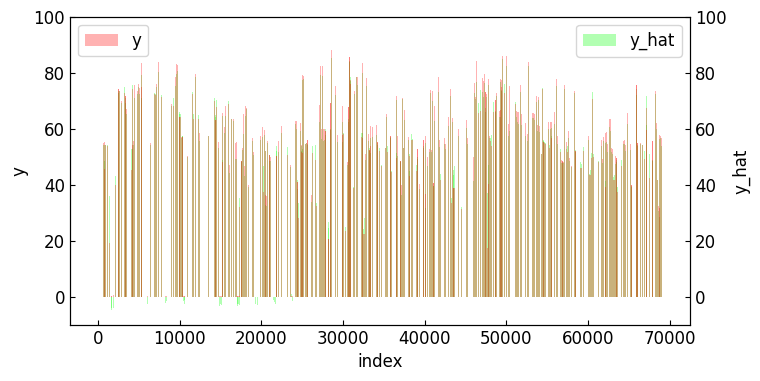

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
 #정규화한 값 되돌리기
max=98.00000
min=0.00000

x = testY.index
y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

#ax1.set_xlim([15000, 55000])

ax1.bar(x, y1, color='#FF0000', alpha=0.3, width=2, label = 'y') #red
ax1.set_ylim(-10, 100)
ax1.set_xlabel('index')
ax1.set_ylabel('y')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx() #x축 공유하는 이중 y축 생성
ax2.bar(x, y2, color='#00FF00', alpha=0.3, width=2, label = 'y_hat') #lime
ax2.set_ylim(-10, 100)
ax2.set_ylabel('y_hat')
ax2.tick_params(axis='y', direction='in')

#배치 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
(testY)

43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64

In [ ]:
df = testY.to_frame(name='y')

In [ ]:
df['y_hat'] = y_hat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20715 entries, 43979 to 40279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20715 non-null  float64
 1   y_hat   20715 non-null  float64
dtypes: float64(2)
memory usage: 485.5 KB


In [ ]:
df

,y,y_hat
43979,0.371429,0.394038
34344,0.491837,0.490091
3560,0.651020,0.658086
46955,0.682653,0.646892
16178,0.000000,-0.031356
...,...,...
40066,0.516327,0.517626
18492,0.675510,0.636632
33337,0.652041,0.611764
30911,0.871429,0.871180


In [ ]:
df['y'] = df['y']*98.00000
df['y_hat'] = df['y_hat']*98.00000

In [ ]:
df['index'] = testX.index

In [ ]:
df

,y,y_hat,index
43979,36.4,38.615679,43979
34344,48.2,48.028947,34344
3560,63.8,64.492446,3560
46955,66.9,63.395458,46955
16178,0.0,-3.072927,16178
...,...,...,...
40066,50.6,50.727353,40066
18492,66.2,62.389950,18492
33337,63.9,59.952844,33337
30911,85.4,85.375611,30911


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

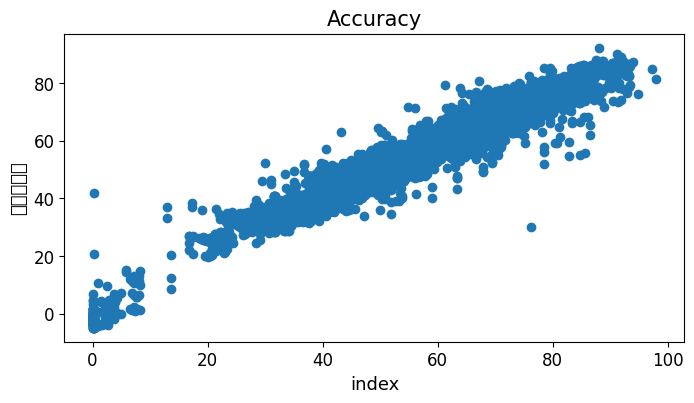

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max=98.00000
min=0.00000

x = testY.index
y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

plt.scatter(y1, y2)
plt.title("Accuracy",fontsize=15)
plt.xlabel("index",fontsize=13)
plt.ylabel("현재저수율",fontsize=13)
plt.show()

# 13

In [ ]:
#모델 생성
model13 = keras.Sequential()
#swish->매우 깊은 신경망에서 relu보다 높은 정확도
model13.add(keras.layers.Dense(16, activation='relu')) #시군 칼럼약 62개 -> 작은 유닛
model13.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model13.add(keras.layers.Dense(64, activation='relu')) #시군 칼럼약 62개 -> 작은 유닛
model13.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model13.add(keras.layers.Dense(128, activation='relu')) #날짜 연월일 3년치
model13.add(layers.Dropout(0.2)) # 드롭아웃 추가.
model13.add(keras.layers.Dense(256, activation='relu')) #댐관련 데이터
model13.add(layers.Dropout(0.2)) # 드롭아웃 추가.
model13.add(keras.layers.Dense(512, activation='swish')) # 가뭄관련 데이터
#중간층이 출력층보다 많이 작으면 정보의 병목 발생
model13.add(layers.Dropout(0.4)) # 드롭아웃 추가.
model13.add(layers.Dense(1)) #출력코드 1개의 값 예측

In [ ]:
#Early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 40)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model13.compile(optimizer="nadam", loss="mse", metrics=["mean_absolute_error"])
#학습
hist13 = model13.fit(trainX, trainY, epochs=1000, validation_split=0.25, callbacks=[callbacks, mc], verbose=0)

In [ ]:
model13_best = keras.models.load_model('best_model.h5')

In [ ]:
model13.evaluate(testX, testY)

648/648 [==============================] - 1s 2ms/step - loss: 0.0010 - mean_absolute_error: 0.0224


[0.0010332849342375994, 0.02239461988210678]

In [ ]:
import pprint
pprint.pprint(hist13.history['mean_absolute_error'])

[0.09093431383371353,
 0.06398113816976547,
 0.05784783139824867,
 0.054179005324840546,
 0.05183601379394531,
 0.049420565366744995,
 0.047231655567884445,
 0.04590662196278572,
 0.0447385273873806,
 0.043487437069416046,
 0.04255536198616028,
 0.04139452055096626,
 0.041123826056718826,
 0.03945448249578476,
 0.03876658156514168,
 0.037759508937597275,
 0.03731314092874527,
 0.037233129143714905,
 0.03685729578137398,
 0.036598920822143555,
 0.03586120903491974,
 0.03588133305311203,
 0.036071985960006714,
 0.035516008734703064,
 0.03504370525479317,
 0.03526470810174942,
 0.03499406576156616,
 0.03459228575229645,
 0.0348222590982914,
 0.034299012273550034,
 0.03446604311466217,
 0.03432057425379753,
 0.03390941396355629,
 0.03376442566514015,
 0.03366442769765854,
 0.03358202427625656,
 0.03373216465115547,
 0.033144354820251465,
 0.03334657475352287,
 0.03302445262670517,
 0.03298462554812431,
 0.03310694918036461,
 0.03275319188833237,
 0.03297945484519005,
 0.03279200941324234,


In [ ]:
from keras.models import load_model
model13.save('deep_learning_model13.h5')

In [ ]:
model13.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                2672      
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

## 모델13 불러와서 모델 사용

- 정규화 되돌리도록

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
new_data = pd.read_csv('수자원 전처리.csv', encoding = 'euc-kr', thousands=',')
new_data.drop('Unnamed: 0', axis=1, inplace = True)
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)
#random_state의 seed가 같으므로 학습에 쓰이지 않은 데이터만 추출 가능

In [ ]:
#모델 불러오기
from keras.models import load_model
model = load_model('deep_learning_model13.h5')

In [ ]:
loss, mae = model.evaluate(testX, testY, batch_size=2)
print(f'loss: {loss}, mean_absoulute_error: {mae}')
#mae는 특이값 많은 경우 유용한데, 이 데이터의 경우 폭우, 폭염에도 정확함을 보여줌

10358/10358 [==============================] - 11s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0224
loss: 0.0010332850506529212, mean_absoulute_error: 0.02239461988210678


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def RMSE(testY, y_hat):
  return np.sqrt(mean_squared_error(testY, y_hat))

In [ ]:
y_pred = model.predict(testX)

In [ ]:
print(f'RMSE: {RMSE(testY, y_pred)}')

RMSE: 0.03214474472874668


In [ ]:
print(y_pred)
print(len(y_pred))
print(testY) #series

[[0.36599135]
 [0.4736164 ]
 [0.6248715 ]
 ...
 [0.61699474]
 [0.88870764]
 [0.59010094]]
20715
43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64


In [ ]:
#시각화를 위해 리스트로 변경
x = testY.index
y = testY.values

In [ ]:
y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

In [ ]:
print(len(y_hat))

20715


In [ ]:
print(len(y))

20715


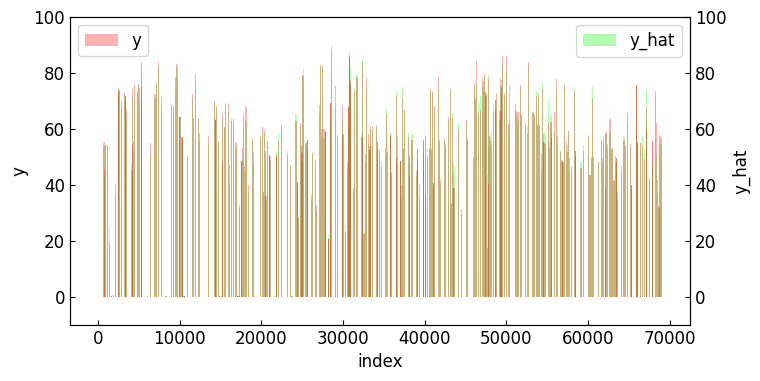

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
 #정규화한 값 되돌리기
max=98.00000
min=0.00000

x = testY.index
y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

#ax1.set_xlim([15000, 55000])

ax1.bar(x, y1, color='#FF0000', alpha=0.3, width=2, label = 'y') #red
ax1.set_ylim(-10, 100)
ax1.set_xlabel('index')
ax1.set_ylabel('y')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx() #x축 공유하는 이중 y축 생성
ax2.bar(x, y2, color='#00FF00', alpha=0.3, width=2, label = 'y_hat') #lime
ax2.set_ylim(-10, 100)
ax2.set_ylabel('y_hat')
ax2.tick_params(axis='y', direction='in')

#배치 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
(testY)

43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64

In [ ]:
df = testY.to_frame(name='y')

In [ ]:
df['y_hat'] = y_hat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20715 entries, 43979 to 40279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20715 non-null  float64
 1   y_hat   20715 non-null  float64
dtypes: float64(2)
memory usage: 485.5 KB


In [ ]:
df

,y,y_hat
43979,0.371429,0.365991
34344,0.491837,0.473616
3560,0.651020,0.624871
46955,0.682653,0.671357
16178,0.000000,0.000203
...,...,...
40066,0.516327,0.493353
18492,0.675510,0.638943
33337,0.652041,0.616995
30911,0.871429,0.888708


In [ ]:
df['y'] = df['y']*98.00000
df['y_hat'] = df['y_hat']*98.00000

In [ ]:
df['index'] = testX.index

In [ ]:
df

,y,y_hat,index
43979,36.4,35.867153,43979
34344,48.2,46.414406,34344
3560,63.8,61.237406,3560
46955,66.9,65.792960,46955
16178,0.0,0.019878,16178
...,...,...,...
40066,50.6,48.348557,40066
18492,66.2,62.616375,18492
33337,63.9,60.465484,33337
30911,85.4,87.093349,30911


In [ ]:
#음수 예측있는지 확인
df[df['y_hat']<0]

,y,y_hat,index
10881,0.2,-0.658572,10881
3140,0.2,-0.025532,3140
10069,0.2,-0.086819,10069
11637,0.2,-0.365476,11637
10885,0.2,-0.589762,10885
...,...,...,...
12964,0.2,-0.632182,12964
10569,0.2,-0.573021,10569
3077,0.2,-0.019831,3077
15296,0.2,-0.035205,15296


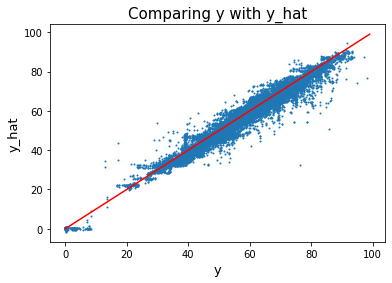

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max=98.00000
min=0.00000

y=testY.values
y_pred = model.predict(testX)

y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

plt.scatter(y1, y2, s=1)

x_check=list(range(0, 100))
y_check=list(range(0, 100))
plt.plot(x_check, y_check, color='red')

plt.title("Comparing y with y_hat",fontsize=15)
plt.xlabel("y",fontsize=13)
plt.ylabel("y_hat",fontsize=13)
plt.show()

# 14

In [ ]:
#모델 생성
model14 = keras.Sequential()
#swish->매우 깊은 신경망에서 relu보다 높은 정확도
model14.add(keras.layers.Dense(16, activation='relu'))
model14.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model14.add(keras.layers.Dense(64, activation='relu')) #시군 칼럼약 62개 -> 작은 유닛
model14.add(layers.Dropout(0.2)) # 드롭아웃 추가.
model14.add(keras.layers.Dense(128, activation='relu')) #날짜 연월일 3년치
model14.add(layers.Dropout(0.3)) # 드롭아웃 추가.
model14.add(keras.layers.Dense(256, activation='swish')) #댐관련 데이터
model14.add(layers.Dropout(0.4)) # 드롭아웃 추가.
model14.add(keras.layers.Dense(512, activation='swish')) # 가뭄관련 데이터
#중간층이 출력층보다 많이 작으면 정보의 병목 발생
model14.add(layers.Dropout(0.5)) # 드롭아웃 추가.
model14.add(layers.Dense(1)) #출력코드 1개의 값 예측

In [ ]:
#Early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 40)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model14.compile(optimizer="adam", loss="mse", metrics=["mean_absolute_error"])
#학습
hist14 = model14.fit(trainX, trainY, epochs=1000, validation_split=0.25, callbacks=[callbacks, mc], verbose=0)

In [ ]:
model14_best = keras.models.load_model('best_model.h5')

In [ ]:
model14.evaluate(testX, testY)

648/648 [==============================] - 1s 2ms/step - loss: 0.0018 - mean_absolute_error: 0.0321


[0.0017895287601277232, 0.03214498609304428]

In [ ]:
import pprint
pprint.pprint(hist14.history['mean_absolute_error'])

[0.09730171412229538,
 0.0683962032198906,
 0.06254953145980835,
 0.05862926319241524,
 0.05636310577392578,
 0.05354569852352142,
 0.05158627778291702,
 0.049045875668525696,
 0.047884680330753326,
 0.04590476676821709,
 0.04456290602684021,
 0.044447533786296844,
 0.04354182630777359,
 0.04277658835053444,
 0.0422629788517952,
 0.04180971160531044,
 0.041760362684726715,
 0.041098661720752716,
 0.041102468967437744,
 0.04073195904493332,
 0.04057716950774193,
 0.0401412732899189,
 0.03992427513003349,
 0.0395011305809021,
 0.03952735662460327,
 0.03961935639381409,
 0.03919141739606857,
 0.03910968452692032,
 0.03865490108728409,
 0.03903575986623764,
 0.03872115537524223,
 0.038369160145521164,
 0.038392502814531326,
 0.03897201269865036,
 0.0387006551027298,
 0.03822004795074463,
 0.03766099363565445,
 0.03875482454895973,
 0.037627238780260086,
 0.03752816841006279,
 0.03790148347616196,
 0.0373232439160347,
 0.03823250159621239,
 0.037480056285858154,
 0.037568509578704834,
 0.03

In [ ]:
from keras.models import load_model
model14.save('deep_learning_model14.h5')

In [ ]:
model14.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                2672      
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)              

## 모델14 불러와서 모델 사용

- 정규화 되돌리도록

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
new_data = pd.read_csv('수자원 전처리.csv', encoding = 'euc-kr', thousands=',')
new_data.drop('Unnamed: 0', axis=1, inplace = True)
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)
#random_state의 seed가 같으므로 학습에 쓰이지 않은 데이터만 추출 가능

In [ ]:
#모델 불러오기
from keras.models import load_model
model = load_model('deep_learning_model14.h5')

In [ ]:
loss, mae = model.evaluate(testX, testY, batch_size=2)
print(f'loss: {loss}, mean_absoulute_error: {mae}')
#mae는 특이값 많은 경우 유용한데, 이 데이터의 경우 폭우, 폭염에도 정확함을 보여줌

10358/10358 [==============================] - 14s 1ms/step - loss: 0.0018 - mean_absolute_error: 0.0321
loss: 0.0017895278288051486, mean_absoulute_error: 0.03214496374130249


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def RMSE(testY, y_hat):
  return np.sqrt(mean_squared_error(testY, y_hat))

In [ ]:
y_pred = model.predict(testX)

In [ ]:
print(f'RMSE: {RMSE(testY, y_pred)}')

RMSE: 0.04230282388898383


In [ ]:
print(y_pred)
print(len(y_pred))
print(testY) #series

[[0.41252062]
 [0.5003639 ]
 [0.6325073 ]
 ...
 [0.5859063 ]
 [0.8046591 ]
 [0.5786109 ]]
20715
43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64


In [ ]:
#시각화를 위해 리스트로 변경
x = testY.index
y = testY.values

In [ ]:
y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

In [ ]:
print(len(y_hat))

20715


In [ ]:
print(len(y))

20715


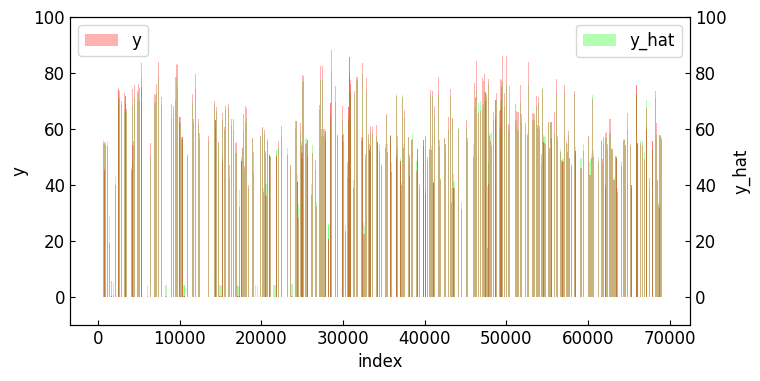

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
 #정규화한 값 되돌리기
max=98.00000
min=0.00000

x = testY.index
y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

#ax1.set_xlim([15000, 55000])

ax1.bar(x, y1, color='#FF0000', alpha=0.3, width=2, label = 'y') #red
ax1.set_ylim(-10, 100)
ax1.set_xlabel('index')
ax1.set_ylabel('y')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx() #x축 공유하는 이중 y축 생성
ax2.bar(x, y2, color='#00FF00', alpha=0.3, width=2, label = 'y_hat') #lime
ax2.set_ylim(-10, 100)
ax2.set_ylabel('y_hat')
ax2.tick_params(axis='y', direction='in')

#배치 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
(testY)

43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64

In [ ]:
df = testY.to_frame(name='y')

In [ ]:
df['y_hat'] = y_hat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20715 entries, 43979 to 40279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20715 non-null  float64
 1   y_hat   20715 non-null  float64
dtypes: float64(2)
memory usage: 485.5 KB


In [ ]:
df

,y,y_hat
43979,0.371429,0.412521
34344,0.491837,0.500364
3560,0.651020,0.632507
46955,0.682653,0.619628
16178,0.000000,0.039879
...,...,...
40066,0.516327,0.531838
18492,0.675510,0.636026
33337,0.652041,0.585906
30911,0.871429,0.804659


In [ ]:
df['y'] = df['y']*98.00000
df['y_hat'] = df['y_hat']*98.00000

In [ ]:
df['index'] = testX.index

In [ ]:
df

,y,y_hat,index
43979,36.4,40.427020,43979
34344,48.2,49.035661,34344
3560,63.8,61.985718,3560
46955,66.9,60.723504,46955
16178,0.0,3.908127,16178
...,...,...,...
40066,50.6,52.120165,40066
18492,66.2,62.330568,18492
33337,63.9,57.418820,33337
30911,85.4,78.856595,30911


In [ ]:
#음수 예측있는지 확인
df[df['y_hat']<0]

,y,y_hat,index


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

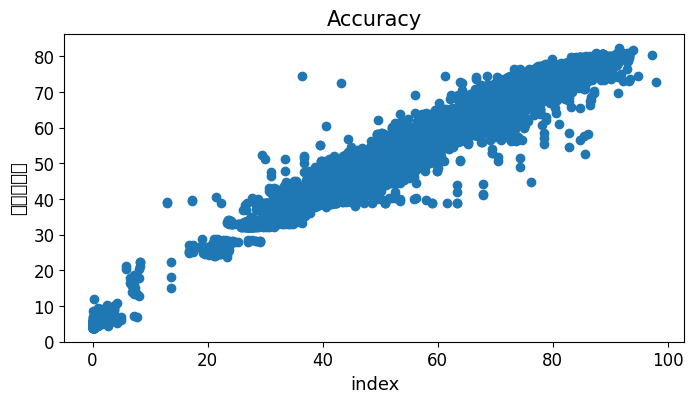

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max=98.00000
min=0.00000

x = testY.index
y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

plt.scatter(y1, y2)
plt.title("Accuracy",fontsize=15)
plt.xlabel("index",fontsize=13)
plt.ylabel("현재저수율",fontsize=13)
plt.show()

# 15

multi-layer perceptron(MLP)


Batch랑 Layer N 방향 다르다

먼저 BN은 “각 feature의 평균과 분산”을 구해서 batch에 있는 “각 feature 를 정규화” 한다.
반면 LN은 “각 input의 feature들에 대한 평균과 분산”을 구해서 batch에 있는 “각 input을 정규화” 한다.

 https://yonghyuc.wordpress.com/2020/03/04/batch-norm-vs-layer-norm/


In [ ]:
new_data

,전일강우량,금년누계강우량,전년누계강우량,예년누계강우량,전일유입량유량,본댐전일방류량유량,조정지전일방류량유량,전년저수위,예년저수위,전년저수량,예년저수량,현재저수율,year,month,day,spi1,spei1,pn1,edi,시군_강릉,시군_거제,시군_거창,시군_경주,시군_고흥,시군_광주,시군_구미,시군_군산,시군_금산,시군_남원,시군_남해,시군_대구,시군_대전,시군_목포,시군_문경,시군_밀양,시군_보령,시군_보은,시군_봉화,시군_부산,시군_부안,...,지점명_부여,지점명_산청,지점명_서산,지점명_서울,지점명_속초,지점명_수원,지점명_안동,지점명_양평,지점명_여수,지점명_영덕,지점명_영주,지점명_영천,지점명_완도,지점명_울산,지점명_울진,지점명_원주,지점명_의성,지점명_이천,지점명_인제,지점명_인천,지점명_임실,지점명_장수,지점명_장흥,지점명_전주,지점명_정읍,지점명_제천,지점명_진주,지점명_창원,지점명_천안,지점명_철원,지점명_청주,지점명_추풍령,지점명_춘천,지점명_충주,지점명_태백,지점명_통영,지점명_포항,지점명_합천,지점명_해남,지점명_홍천
0,0.0,0.338999,0.393425,0.465209,0.002628,0.008952,0.000000,0.767246,0.732834,0.787753,0.808342,0.570408,0.0,0.636364,0.0,0.096128,0.351171,0.026841,0.231195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.303169,0.293151,0.436713,0.000202,0.001194,0.000925,0.576187,0.577265,0.230451,0.310982,0.568367,0.0,0.636364,0.0,0.359146,0.301003,0.035923,0.246681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.279283,0.255890,0.370444,0.000202,0.008355,0.008555,0.601155,0.583294,0.115432,0.124076,0.570408,0.0,0.636364,0.0,0.424566,0.468227,0.057214,0.252212,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.338999,0.393425,0.465209,0.002628,0.008952,0.000000,0.767246,0.732834,0.787753,0.808342,0.570408,0.0,0.636364,0.0,0.272363,0.334448,0.028153,0.228982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.338999,0.393425,0.465209,0.002628,0.008952,0.000000,0.767246,0.732834,0.787753,0.808342,0.570408,0.0,0.636364,0.0,0.315087,0.267559,0.032391,0.190265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69043,0.0,0.355076,0.663562,0.580517,0.002224,0.005769,0.000000,0.071844,0.020271,0.092263,0.061246,0.343878,1.0,0.545455,1.0,0.594126,0.658863,0.126516,0.298673,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69044,0.0,0.355076,0.663562,0.580517,0.002224,0.005769,0.000000,0.071844,0.020271,0.092263,0.061246,0.343878,1.0,0.545455,1.0,0.638184,0.710702,0.147949,0.285398,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69045,0.0,0.355076,0.663562,0.580517,0.002224,0.005769,0.000000,0.071844,0.020271,0.092263,0.061246,0.343878,1.0,0.545455,1.0,0.447263,0.444816,0.064812,0.198009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69046,0.0,0.264125,0.603288,0.494367,0.000606,0.003382,0.003931,0.733741,0.641561,0.304923,0.194298,0.466327,1.0,0.545455,1.0,0.473965,0.478261,0.077112,0.216814,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_data.drop('edi', axis=1, inplace=True)

In [ ]:
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [ ]:
len(trainX.columns)

165

In [ ]:
#모델 생성
model15 = keras.Sequential()
#swish->매우 깊은 신경망에서 relu보다 높은 정확도
#relu가 미분을 했을 때 음수 값에서는 0을 가지게 돼서 결국 neural network 가 더 이상 update가 되지 않는다.
#gradient가 0이 되면, 더이상 업데이트는 되지 않고 즉 발전하지 않는다.

model15.add(tf.keras.layers.Input(shape=[165]))
model15.add(keras.layers.Dense(16, activation='gelu'))
model15.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model15.add(keras.layers.BatchNormalization())
model15.add(keras.layers.Dense(128, activation='selu'))
model15.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model15.add(keras.layers.BatchNormalization())
model15.add(keras.layers.Dense(256, activation='swish'))
model15.add(layers.Dropout(0.2)) # 드롭아웃 추가.
model15.add(keras.layers.BatchNormalization())
model15.add(keras.layers.Dense(512, activation='relu'))
model15.add(layers.Dropout(0.3)) # 드롭아웃 추가.
model15.add(keras.layers.BatchNormalization())

model15.add(layers.Dense(1)) #출력코드 1개의 값 예측


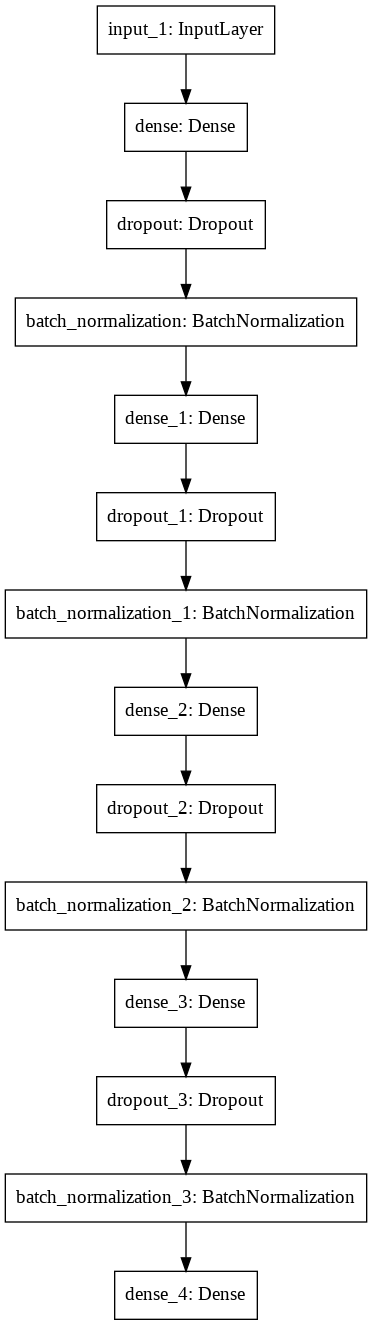

In [ ]:
keras.utils.plot_model(model15)

In [ ]:
#Early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 100)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)


model15.compile(optimizer= 'adam',
                loss=keras.losses.mean_squared_error,
                metrics=["mean_absolute_error", keras.metrics.mean_squared_error])
#학습
hist15 = model15.fit(trainX, trainY, epochs=10000,
                     batch_size = 2048, shuffle=True, validation_split=0.25,
                     callbacks=[callbacks, mc], verbose=0)
'''
#Early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 100)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model15.compile(optimizer= keras.optimizers.Adadelta(learning_rate=0.007, rho=0.8, epsilon=1e-6),
                loss=keras.losses.mean_squared_error,
                metrics=["mean_absolute_error", keras.metrics.mean_squared_error])
#학습
hist15 = model15.fit(trainX, trainY, epochs=10000,
                     batch_size = 2048, shuffle=True, validation_split=0.25,
                     callbacks=[callbacks, mc], verbose=0)
'''

'\n#Early stopping\ncallbacks = keras.callbacks.EarlyStopping(monitor=\'val_loss\', patience = 100)\nmc = keras.callbacks.ModelCheckpoint(\'best_model.h5\', monitor=\'val_loss\', mode=\'min\', save_best_only=True)\n\nmodel15.compile(optimizer= keras.optimizers.Adadelta(learning_rate=0.007, rho=0.8, epsilon=1e-6),\n                loss=keras.losses.mean_squared_error, \n                metrics=["mean_absolute_error", keras.metrics.mean_squared_error])\n#학습\nhist15 = model15.fit(trainX, trainY, epochs=10000, \n                     batch_size = 2048, shuffle=True, validation_split=0.25,\n                     callbacks=[callbacks, mc], verbose=0)\n'

In [ ]:
model15_best = keras.models.load_model('best_model.h5')

In [ ]:
model15.evaluate(testX, testY)

648/648 [==============================] - 2s 3ms/step - loss: 3.0356e-04 - mean_absolute_error: 0.0125 - mean_squared_error: 3.0356e-04


[0.0003035637200810015, 0.012484018690884113, 0.0003035637200810015]

In [ ]:
print(hist15.history)
print(len(hist15.history['loss']))

{'loss': [1.3775242567062378, 0.6803330183029175, 0.5021868348121643, 0.38710153102874756, 0.2935069501399994, 0.23633715510368347, 0.18542668223381042, 0.14720462262630463, 0.11977697163820267, 0.09986217319965363, 0.08253644406795502, 0.07219414412975311, 0.061538126319646835, 0.05429365113377571, 0.04717429727315903, 0.042553823441267014, 0.03796691820025444, 0.0337044931948185, 0.030860669910907745, 0.0274499524384737, 0.02560834400355816, 0.023518383502960205, 0.02206658385694027, 0.02026727981865406, 0.018969200551509857, 0.018116910010576248, 0.017129097133874893, 0.016516443341970444, 0.015789493918418884, 0.015008654445409775, 0.014473244547843933, 0.013768822886049747, 0.013427123427391052, 0.012913831509649754, 0.012539362534880638, 0.012229165993630886, 0.012069342657923698, 0.01171295065432787, 0.011544624343514442, 0.011309993453323841, 0.011064905673265457, 0.010863657109439373, 0.010542540811002254, 0.010562887415289879, 0.010327490977942944, 0.010212516412138939, 0.009

In [ ]:
print(hist15.history['mean_absolute_error'])
print(hist15.history['mean_squared_error'])

[0.9140881299972534, 0.6451603770256042, 0.5541463494300842, 0.4852418303489685, 0.4228488504886627, 0.37861889600753784, 0.3354419767856598, 0.29957959055900574, 0.2702602446079254, 0.24767374992370605, 0.2249017059803009, 0.21061305701732635, 0.19473199546337128, 0.18248403072357178, 0.17024877667427063, 0.16253110766410828, 0.15319697558879852, 0.14457981288433075, 0.13843666017055511, 0.13027311861515045, 0.12603648006916046, 0.12064722925424576, 0.1168413981795311, 0.11210527271032333, 0.10815349221229553, 0.10589610040187836, 0.10270272940397263, 0.10043492913246155, 0.09821324795484543, 0.09563135355710983, 0.09369634836912155, 0.09142238646745682, 0.08990836888551712, 0.08841495960950851, 0.08693907409906387, 0.08595295995473862, 0.08515612781047821, 0.08391077071428299, 0.08318483829498291, 0.08233781903982162, 0.08123156428337097, 0.08068009465932846, 0.0796491876244545, 0.07926838099956512, 0.07848252356052399, 0.07803603261709213, 0.0772770494222641, 0.07660794258117676, 0.

In [ ]:
from keras.models import load_model
model15.save('deep_learning_model15.h5')

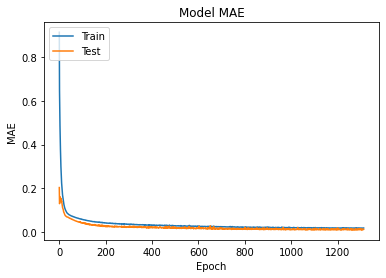

In [ ]:
#훈련 과정 시각화 (MAE)
plt.plot(hist15.history["mean_absolute_error"])
plt.plot(hist15.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

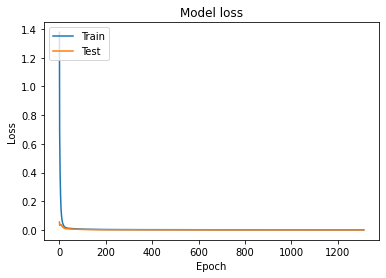

In [ ]:
#훈련 과정 시각화 (손실)
plt.plot(hist15.history['loss'])
plt.plot(hist15.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model15.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2656      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3

## 모델15 불러와서 모델 사용

- 정규화 되돌리도록

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
new_data = pd.read_csv('수자원 전처리.csv', encoding = 'euc-kr', thousands=',')
new_data.drop('Unnamed: 0', axis=1, inplace = True)
new_data.drop('edi', axis=1, inplace=True)
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)
#random_state의 seed가 같으므로 학습에 쓰이지 않은 데이터만 추출 가능

In [ ]:
len(trainX.columns)

165

In [ ]:
#모델 불러오기
from keras.models import load_model
model = load_model('분석모형.h5')

In [ ]:
loss, mae, mse = model.evaluate(testX, testY, batch_size=2)
print(f'loss: {loss}, mean_absoulute_error: {mae}, mse: {mse}')
#mae는 특이값 많은 경우 유용한데, 이 데이터의 경우 폭우, 폭염에도 정확함을 보여줌

 2518/10358 [======>.......................] - ETA: 10s - loss: 3.3097e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 3.3097e-04

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def RMSE(testY, y_hat):
  return np.sqrt(mean_squared_error(testY, y_hat))

In [ ]:
y_pred = model.predict(testX)

In [ ]:

#y_pred 음수인 것은 0으로 바꿈
y_hat = []
for i in range(len(y_pred)):
   #if y_pred[i][0] >= 0:
    y_hat.append(y_pred[i][0])
  #elif y_pred[i][0] < 0:
  #  y_hat.append(0)


In [ ]:
#음수 예측 확인
for i in y_hat:
  if i < 0:
    print('음수 있음')

In [ ]:
print(f'RMSE: {RMSE(testY, y_pred)}')
print(f'RMSE: {RMSE(testY, y_hat)}') #0으로 바꾸고 나서

RMSE: 0.017423081839695733
RMSE: 0.016694435183953953


In [ ]:
print(y_pred)
print(len(y_pred))
print(testY) #series

[[0.38029543]
 [0.49437812]
 [0.6827545 ]
 ...
 [0.63086736]
 [0.902745  ]
 [0.5848402 ]]
20715
43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64


In [ ]:
#시각화를 위해 리스트로 변경
x = testY.index
y = testY.values

In [ ]:
print(len(y_hat))

20715


In [ ]:
print(len(y))

20715


In [ ]:
df=testY.to_frame(name='y')
df['y_hat'] = y_hat

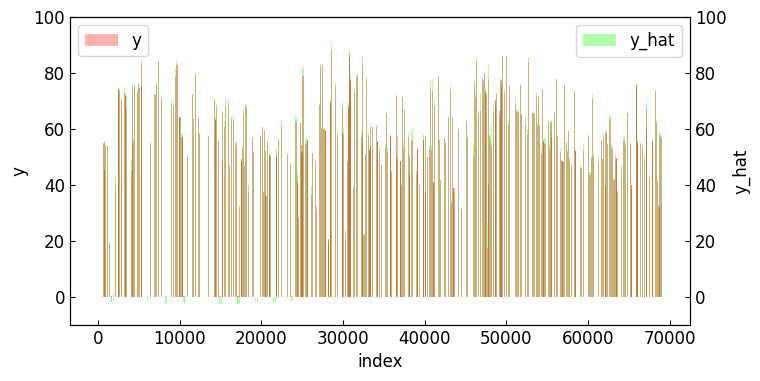

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
 #정규화한 값 되돌리기
max=98.00000
min=0.00000

x = testY.index
y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

#ax1.set_xlim([15000, 55000])

ax1.bar(x, y1, color='#FF0000', alpha=0.3, width=2, label = 'y') #red
ax1.set_ylim(-10, 100)
ax1.set_xlabel('index')
ax1.set_ylabel('y')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx() #x축 공유하는 이중 y축 생성
ax2.bar(x, y2, color='#00FF00', alpha=0.3, width=2, label = 'y_hat') #lime
ax2.set_ylim(-10, 100)
ax2.set_ylabel('y_hat')
ax2.tick_params(axis='y', direction='in')

#배치 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
(testY)

43979    0.371429
34344    0.491837
3560     0.651020
46955    0.682653
16178    0.000000
           ...   
40066    0.516327
18492    0.675510
33337    0.652041
30911    0.871429
40279    0.581633
Name: 현재저수율, Length: 20715, dtype: float64

In [ ]:
df = testY.to_frame(name='y')

In [ ]:
df['y_hat'] = y_hat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20715 entries, 43979 to 40279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20715 non-null  float64
 1   y_hat   20715 non-null  float64
dtypes: float64(2)
memory usage: 485.5 KB


In [ ]:
df

,y,y_hat
43979,0.371429,0.380295
34344,0.491837,0.494378
3560,0.651020,0.682755
46955,0.682653,0.666017
16178,0.000000,0.000000
...,...,...
40066,0.516327,0.511633
18492,0.675510,0.698928
33337,0.652041,0.630867
30911,0.871429,0.902745


In [ ]:
df['y'] = df['y']*98.00000
df['y_hat'] = df['y_hat']*98.00000

In [ ]:
df['index'] = testX.index

In [ ]:
df

,y,y_hat,index
43979,36.4,37.268946,43979
34344,48.2,48.449059,34344
3560,63.8,66.909948,3560
46955,66.9,65.269619,46955
16178,0.0,0.000000,16178
...,...,...,...
40066,50.6,50.140003,40066
18492,66.2,68.494967,18492
33337,63.9,61.825001,33337
30911,85.4,88.469011,30911


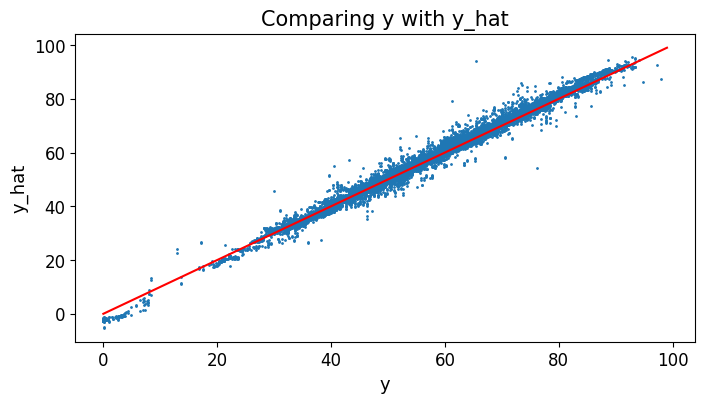

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max=98.00000
min=0.00000

y=testY.values
y_pred = model.predict(testX)

y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

y1 = [i*max for i in y]
y2 = [i*max for i in y_hat]

plt.scatter(y1, y2, s=1)

x_check=list(range(0, 100))
y_check=list(range(0, 100))
plt.plot(x_check, y_check, color='red')

plt.title("Comparing y with y_hat",fontsize=15)
plt.xlabel("y",fontsize=13)
plt.ylabel("y_hat",fontsize=13)
plt.show()

# std 정규화한 데이터 이용
- 예외 상황 예측 어려움 (이상치에 강하지만. 강하다=영향 덜받는다=>과적합은 피할 순 있다)

## 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [ ]:
new_data = pd.read_csv('수자원 전처리(std norm).csv', encoding = 'euc-kr', thousands=',')

FileNotFoundError: ignored

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69048 entries, 0 to 69047
Columns: 168 entries, Unnamed: 0 to 지점명_홍천
dtypes: float64(19), int64(149)
memory usage: 88.5 MB


In [ ]:
new_data.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [ ]:
#모델 생성
model10 = keras.Sequential()
#swish->매우 깊은 신경망에서 relu보다 높은 정확도
model10.add(keras.layers.Dense(16, activation='relu')) #시군 칼럼약 62개 -> 작은 유닛
model10.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model10.add(keras.layers.Dense(128, activation='relu')) #날짜 연월일 3년치
model10.add(layers.Dropout(0.1)) # 드롭아웃 추가.
model10.add(keras.layers.Dense(256, activation='relu')) #댐관련 데이터
model10.add(layers.Dropout(0.2)) # 드롭아웃 추가.
model10.add(keras.layers.Dense(512, activation='swish')) # 가뭄관련 데이터
#중간층이 출력층보다 많이 작으면 정보의 병목 발생
model10.add(layers.Dropout(0.3)) # 드롭아웃 추가.
model10.add(layers.Dense(1)) #출력코드 1개의 값 예측

In [ ]:
#Early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 40)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model10.compile(optimizer="adam", loss="mse", metrics=["mean_absolute_error"])
#학습
hist10 = model10.fit(trainX, trainY, epochs=1000, validation_split=0.25, callbacks=[callbacks, mc], verbose=0)

In [ ]:
model10_best = keras.models.load_model('best_model.h5')

In [ ]:
model10.evaluate(testX, testY)

648/648 [==============================] - 1s 2ms/step - loss: 0.0172 - mean_absolute_error: 0.0884


[0.017228998243808746, 0.08835262805223465]

In [ ]:
import pprint
pprint.pprint(hist10.history['mean_absolute_error'])

[0.36288318037986755,
 0.23831182718276978,
 0.20690439641475677,
 0.1910884827375412,
 0.18051078915596008,
 0.17388500273227692,
 0.16736268997192383,
 0.16057737171649933,
 0.1545637547969818,
 0.15532006323337555,
 0.14941076934337616,
 0.14826878905296326,
 0.14347423613071442,
 0.14287057518959045,
 0.1400955617427826,
 0.13998179137706757,
 0.1364964246749878,
 0.1360471546649933,
 0.13548927009105682,
 0.13297921419143677,
 0.1310727596282959,
 0.13253845274448395,
 0.12939384579658508,
 0.1306706815958023,
 0.1277550905942917,
 0.1288934350013733,
 0.12584219872951508,
 0.12570632994174957,
 0.1275712549686432,
 0.12377182394266129,
 0.12423542886972427,
 0.12337405234575272,
 0.12282103300094604,
 0.12262067943811417,
 0.12114070355892181,
 0.12225442379713058,
 0.12080815434455872,
 0.12010297924280167,
 0.12103141099214554,
 0.12042567133903503,
 0.1205686554312706,
 0.11802338063716888,
 0.11854276061058044,
 0.117217056453228,
 0.11930356174707413,
 0.11849700659513474,
 

In [ ]:
from keras.models import load_model
model10.save('deep_learning_model10.h5')

In [ ]:
model10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2672      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

## 모델10 불러와서 모델 사용

- 정규화 되돌리도록

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
new_data = pd.read_csv('수자원 전처리(std norm).csv', encoding = 'euc-kr', thousands=',')
new_data.drop('Unnamed: 0', axis=1, inplace = True)
feature_columns = list(new_data.columns.difference(['현재저수율']))
x = new_data[feature_columns]
y = new_data['현재저수율']

#train, test 분리
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state = 50)
#random_state의 seed가 같으므로 학습에 쓰이지 않은 데이터만 추출 가능

In [ ]:
#모델 불러오기
from keras.models import load_model
model = load_model('deep_learning_model10.h5')

In [ ]:
loss, mae = model.evaluate(testX, testY, batch_size=2)
print(f'loss: {loss}, mean_absoulute_error: {mae}')
#mae는 특이값 많은 경우 유용한데, 이 데이터의 경우 폭우, 폭염에도 정확함을 보여줌

10358/10358 [==============================] - 12s 1ms/step - loss: 0.0172 - mean_absolute_error: 0.0884
loss: 0.017229029908776283, mean_absoulute_error: 0.0883527621626854


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def RMSE(testY, y_hat):
  return np.sqrt(mean_squared_error(testY, y_hat))

In [ ]:
y_pred = model.predict(testX)

In [ ]:
#y_pred 음수인 것은 0으로 바꿈
y_hat = []
for i in range(len(y_pred)):
  if y_pred[i][0] >= 0:
    y_hat.append(y_pred[i][0])
  elif y_pred[i][0] < 0:
    y_hat.append(0)

In [ ]:
#음수 예측 확인
for i in y_hat:
  if i < 0:
    print('음수 있음')

In [ ]:
print(f'RMSE: {RMSE(testY, y_pred)}')
print(f'RMSE: {RMSE(testY, y_hat)}')

RMSE: 0.13125927419360012
RMSE: 0.8160989215774588


In [ ]:
print(y_pred)
print(len(y_pred))
print(testY) #series

[[-0.89339393]
 [-0.48294553]
 [ 0.51976407]
 ...
 [ 0.09245841]
 [ 1.6862024 ]
 [-0.02135689]]
20715
43979   -1.130144
34344   -0.468511
3560     0.406190
46955    0.580008
16178   -3.171112
           ...   
40066   -0.333942
18492    0.540759
33337    0.411797
30911    1.617314
40279    0.024910
Name: 현재저수율, Length: 20715, dtype: float64


In [ ]:
#시각화를 위해 리스트로 변경
x = testY.index
y = testY.values

In [ ]:
print(len(y_hat))

20715


In [ ]:
print(len(y))

20715


In [ ]:
df=testY.to_frame(name='y')
df['y_hat'] = y_hat

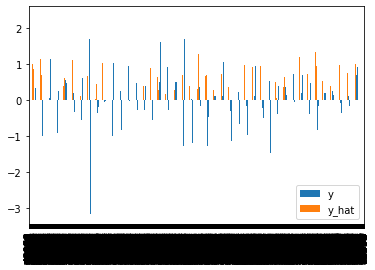

In [ ]:
df.plot(y = ['y', 'y_hat'], kind='bar')

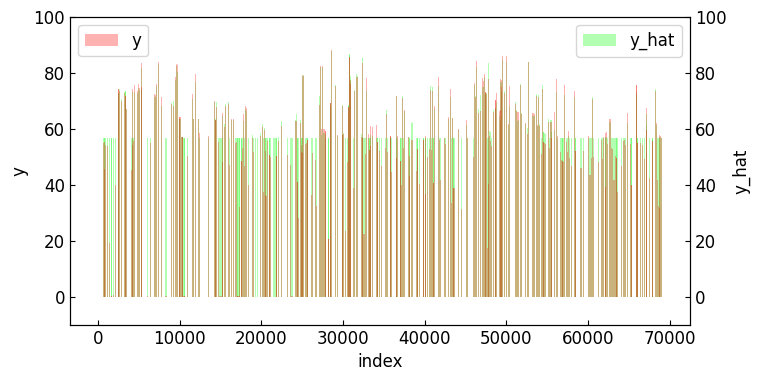

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
 #정규화한 값 되돌리기
std=17.834671
mean=56.555744

x = testY.index
y1 = [(i*std)+mean for i in y]
y2 = [(i*std)+mean for i in y_hat]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

#ax1.set_xlim([15000, 55000])

ax1.bar(x, y1, color='#FF0000', alpha=0.3, width=2, label = 'y') #red
ax1.set_ylim(-10, 100)
ax1.set_xlabel('index')
ax1.set_ylabel('y')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx() #x축 공유하는 이중 y축 생성
ax2.bar(x, y2, color='#00FF00', alpha=0.3, width=2, label = 'y_hat') #lime
ax2.set_ylim(-10, 100)
ax2.set_ylabel('y_hat')
ax2.tick_params(axis='y', direction='in')

#배치 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
(testY)

43979   -1.130144
34344   -0.468511
3560     0.406190
46955    0.580008
16178   -3.171112
           ...   
40066   -0.333942
18492    0.540759
33337    0.411797
30911    1.617314
40279    0.024910
Name: 현재저수율, Length: 20715, dtype: float64

In [ ]:
df = testY.to_frame(name='y')

In [ ]:
df['y_hat'] = y_hat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20715 entries, 43979 to 40279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20715 non-null  float64
 1   y_hat   20715 non-null  float64
dtypes: float64(2)
memory usage: 485.5 KB


In [ ]:
df

,y,y_hat
43979,-1.130144,0.000000
34344,-0.468511,0.000000
3560,0.406190,0.519764
46955,0.580008,0.530662
16178,-3.171112,0.000000
...,...,...
40066,-0.333942,0.000000
18492,0.540759,0.385519
33337,0.411797,0.092458
30911,1.617314,1.686202


In [ ]:
df['index'] = testX.index

In [ ]:
df

,y,y_hat,index
43979,-110.754101,0.000000,43979
34344,-45.914103,0.000000,34344
3560,39.806573,50.936878,3560
46955,56.840809,52.004847,46955
16178,-310.769010,0.000000,16178
...,...,...,...
40066,-32.726307,0.000000,40066
18492,52.994369,37.780897,18492
33337,40.356064,9.060924,33337
30911,158.496738,165.247836,30911


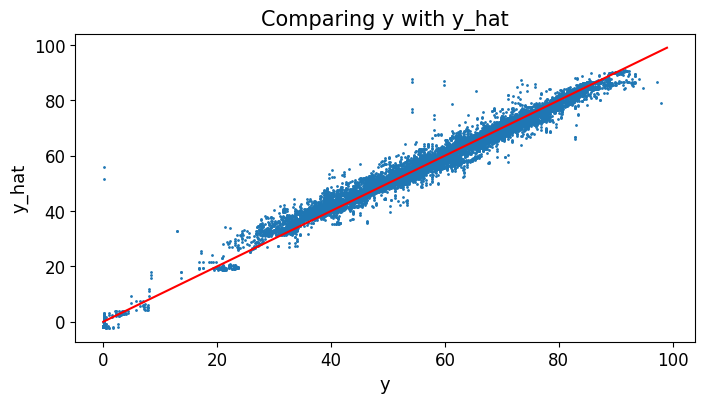

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y=testY.values
y_pred = model.predict(testX)

y_hat = []
for i in range(len(y_pred)):
  y_hat.append(y_pred[i][0])

 #정규화한 값 되돌리기
std=17.834671
mean=56.555744

x = testY.index
y1 = [(i*std)+mean for i in y]
y2 = [(i*std)+mean for i in y_hat]

plt.scatter(y1, y2, s=1)

x_check=list(range(0, 100))
y_check=list(range(0, 100))
plt.plot(x_check, y_check, color='red')

plt.title("Comparing y with y_hat",fontsize=15)
plt.xlabel("y",fontsize=13)
plt.ylabel("y_hat",fontsize=13)
plt.show()